In [1]:
import random
import numpy as np
from _simulations import simulate_bids, simulate_regrets
from _plot import regrets_plot

# Set the seed
random.seed(123)
np.random.seed(123)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Generate bids

In [2]:
norm_bids_dict = simulate_bids(
    dist_name="truncnorm",
    lower=0.9,
    upper=10.1,
    max_N=1000,
    max_n=200,
    max_N_train=200,
    max_n_train=200,
)
expon_bids_dict = simulate_bids(
    dist_name="truncexpon",
    lower=0.9,
    upper=11,
    max_N=1000,
    max_n=200,
    max_N_train=200,
    max_n_train=200,
)
beta_bids_dict = simulate_bids(
    dist_name="beta",
    lower=0,
    upper=10.1,
    max_N=1000,
    max_n=200,
    max_N_train=200,
    max_n_train=200,
)

/Users/qiqi/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minimize.py:892: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


# Run auctions

In [3]:
dist_names = ["truncnorm", "truncexpon", "beta"]
bids_dicts = [norm_bids_dict, expon_bids_dict, beta_bids_dict]

In [4]:
ns = [10, 20, 50, 200]
Nn_trains = [(50, 10), (50, 200), (200, 200)]

In [5]:
regrets_dict = {}
for i, dist_name in enumerate(dist_names):
    regrets_to_plot = []
    for n in ns:
        regrets_to_plot.append(
            simulate_regrets(bids_dicts[i], 1, 10, "ecdf", N=1000, n=n)
        )
        regrets_to_plot.append(
            simulate_regrets(bids_dicts[i], 1, 10, "kde", N=1000, n=n)
        )
        for N_train, n_train in Nn_trains:
            regrets_to_plot.append(
                simulate_regrets(
                    bids_dicts[i],
                    1,
                    10,
                    "rde",
                    N=1000,
                    n=n,
                    N_train=N_train,
                    n_train=n_train,
                )
            )
    regrets_dict[dist_name] = regrets_to_plot

In [6]:
import pickle

# Write object to a file
with open("sim_regrets.pkl", "wb") as file:
    pickle.dump(regrets_dict, file)

In [7]:
import pickle

# Read object back from the file
with open("sim_regrets.pkl", "rb") as file:
    regrets_dict = pickle.load(file)

/Users/qiqi/Desktop/ADPP/_plot.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


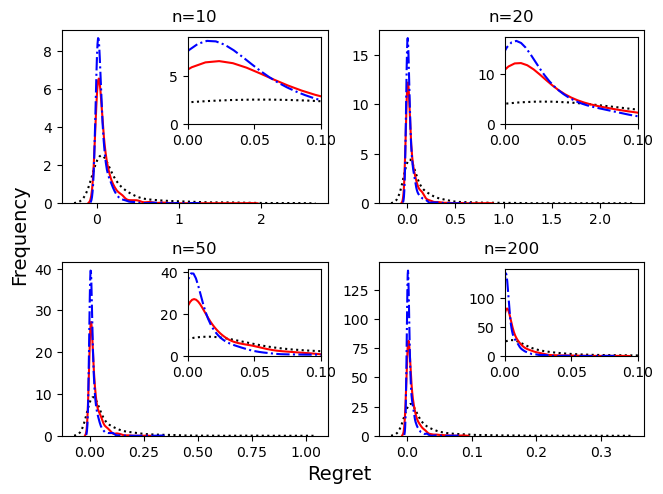

In [8]:
regrets_plot(regrets_dict["truncnorm"], ns)

/Users/qiqi/Desktop/ADPP/_plot.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


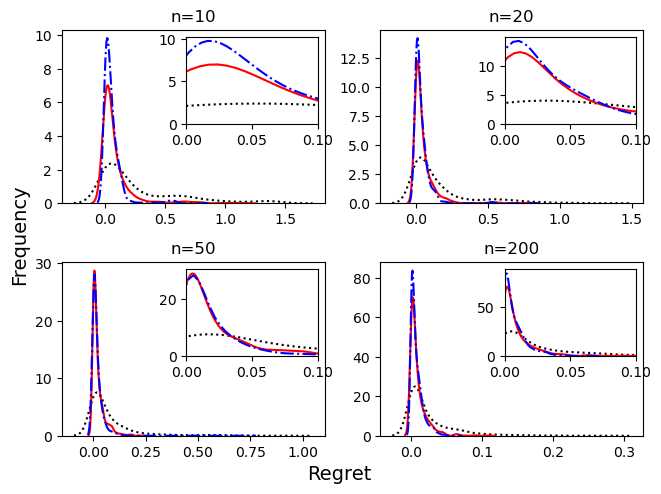

In [9]:
regrets_plot(regrets_dict["truncexpon"], ns)

/Users/qiqi/Desktop/ADPP/_plot.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


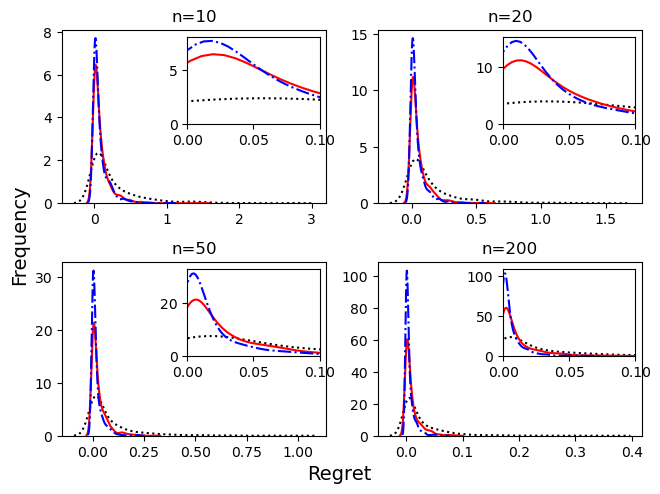

In [10]:
regrets_plot(regrets_dict["beta"], ns)